#  決定係数
　予測結果と正解データがすべてピッタリ一致する場合、１になる評価値である。どの入力データでも予測結果が同じになる場合に、０になる。通常１に近いほどモデルの性能が高い。
　回帰の評価指標として、R2の他に、MAPE(平均絶対誤差率)、RMSE(Root Mean Squere Error)、MAE(Mean Absolute Error)などの手法がある。

## 0. 設定

In [1]:
# Do not show warnings
import warnings
warnings.filterwarnings('ignore')

# import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# matplotlib for japanese support
import japanize_matplotlib

# functions for data frame display
from IPython.display import display

# Adjust display options
np.set_printoptions(suppress=True, precision=4)
pd.options.display.float_format = '{:.4f}'.format
pd.set_option("display.max_columns", None)
plt.rcParams["font.size"]=14
random_seed = 123

## 1. データの読み込み

In [2]:
from sklearn.datasets import load_boston
boston = load_boston()

df = pd.DataFrame(boston.data, columns=boston.feature_names)
y = boston.target

df1 = df[['RM']]

## 2. 回帰分析

In [3]:
from xgboost import XGBRegressor
algorithm1 = XGBRegressor(objective ='reg:squarederror',
    random_state=random_seed)
algorithm1.fit(df1, y)
y_pred1 = algorithm1.predict(df1)

from xgboost import XGBRegressor
algorithm2 = XGBRegressor(objective ='reg:squarederror',
    random_state=random_seed)
algorithm2.fit(df, y)
y_pred2 = algorithm2.predict(df)

## 3. 結果確認

In [4]:
display(df.head())
display(df1.head())
print(y[:5])

print(f'y[:5] {y[:5]}')
print(f'y_pred1[:5] {y_pred1[:5]}')
print(f'y_pred2[:5] {y_pred2[:5]}')

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.0063,18.0000,2.3100,0.0000,0.5380,6.5750,65.2000,4.0900,1.0000,296.0000,15.3000,396.9000,4.9800
1,0.0273,0.0000,7.0700,0.0000,0.4690,6.4210,78.9000,4.9671,2.0000,242.0000,17.8000,396.9000,9.1400
2,0.0273,0.0000,7.0700,0.0000,0.4690,7.1850,61.1000,4.9671,2.0000,242.0000,17.8000,392.8300,4.0300
3,0.0324,0.0000,2.1800,0.0000,0.4580,6.9980,45.8000,6.0622,3.0000,222.0000,18.7000,394.6300,2.9400
4,0.0691,0.0000,2.1800,0.0000,0.4580,7.1470,54.2000,6.0622,3.0000,222.0000,18.7000,396.9000,5.3300


,RM
0,6.5750
1,6.4210
2,7.1850
3,6.9980
4,7.1470


[24.  21.6 34.7 33.4 36.2]
y[:5] [24.  21.6 34.7 33.4 36.2]
y_pred1[:5] [24.2265 20.5349 34.8044 32.9725 35.9762]
y_pred2[:5] [24.0193 21.5997 34.7074 33.4074 36.1893]


## 4. 散布図による確認

[ 5. 50.]


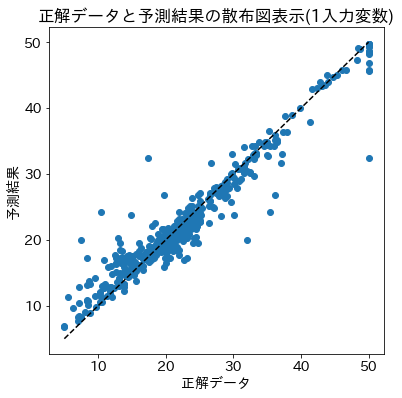

In [5]:
y_range = np.array([y.min(), y.max()])
print(y_range)
plt.figure(figsize=(6,6))
plt.scatter(y, y_pred1)
plt.plot(y_range, y_range, 'k--')

plt.xlabel('正解データ')
plt.ylabel('予測結果')
plt.title('正解データと予測結果の散布図表示(1入力変数)')
plt.show()

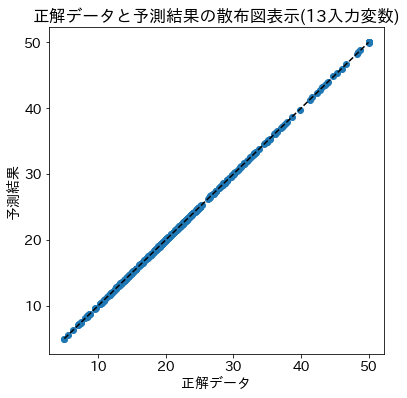

In [6]:
plt.figure(figsize=(6,6))
plt.scatter(y, y_pred2)
plt.plot(y_range, y_range, 'k--')
plt.xlabel('正解データ')
plt.ylabel('予測結果')
plt.title('正解データと予測結果の散布図表示(13入力変数)')
plt.show()

## ５. 決定係数による確認

In [7]:
from sklearn.metrics import r2_score
r2_score1 = r2_score(y, y_pred1)
print(f'R2 score(1入力変数): {r2_score1:.4f}')
r2_score2 = r2_score(y, y_pred2)
print(f'R2 score(13入力変数): {r2_score2:.4f}')

R2 score(1入力変数): 0.9251
R2 score(13入力変数): 1.0000
